In [1]:
import math
import statistics

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
PATH = "graphics"

In [3]:
sns.set_theme()
sns.set(font_scale=1.2, font="cmss10")
plt.figure(figsize=(11, 8), dpi=200)
colors = ["#2B7BB2", "#E66411", "#72B300"]
palette = sns.set_palette(sns.color_palette(colors))

<Figure size 2200x1600 with 0 Axes>

In [4]:
ALGORITHMS = ("pagerank", "betweenness_centrality")
SCALES = (2, 3, 5, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23)
LIBRARIES = ("cuGraph", "MAGE", "NetworkX")

pr_data = pd.DataFrame()
bc_data = pd.DataFrame()

for algorithm in ALGORITHMS:
    data = pd.DataFrame()

    for scale in SCALES:
        for library in LIBRARIES:
            file_name = f"./output/{algorithm}/{library}_{scale}.txt"
            if (library == "NetworkX" and scale > 14) or (
                library == "MAGE" and scale > 20
            ):
                load_data = {
                    "query_time": [math.inf],
                    "total_time": [math.inf],
                    "loading_time": [math.inf],
                    "execution_time": [math.inf],
                }
                load_data = pd.DataFrame(data=load_data)
            else:
                load_data = pd.read_csv(file_name)

            if library == "NetworkX":
                load_data["library"] = "NetworkX"
            elif library == "cuGraph":
                load_data["library"] = "cuGraph"
            elif library == "MAGE":
                load_data["library"] = "MAGE"
            load_data["scale"] = scale

            data = pd.concat([data, load_data])

    data["scale"] = 2 ** data["scale"]
    data.reset_index(inplace=True)

    if algorithm == "betweenness_centrality":
        bc_data = data
    elif algorithm == "pagerank":
        pr_data = data

In [5]:
pr_medians_df = pd.DataFrame()
bc_medians_df = pd.DataFrame()

for algorithm in ALGORITHMS:
    data = pr_data if algorithm == "pagerank" else bc_data
    medians_df = pd.DataFrame()

    for library in LIBRARIES:
        for scale in data.scale.unique():
            frame = data.loc[(data.scale == scale) & (data.library == library)]

            load_data = {
                "scale": [scale],
                "Library": [library],
                "median_execution_time": [statistics.median(frame.execution_time)],
            }
            load_data = pd.DataFrame(data=load_data)

            medians_df = pd.concat([medians_df, load_data])

    medians_df.reset_index(inplace=True)
    if algorithm == "betweenness_centrality":
        bc_medians_df = medians_df
    elif algorithm == "pagerank":
        pr_medians_df = medians_df

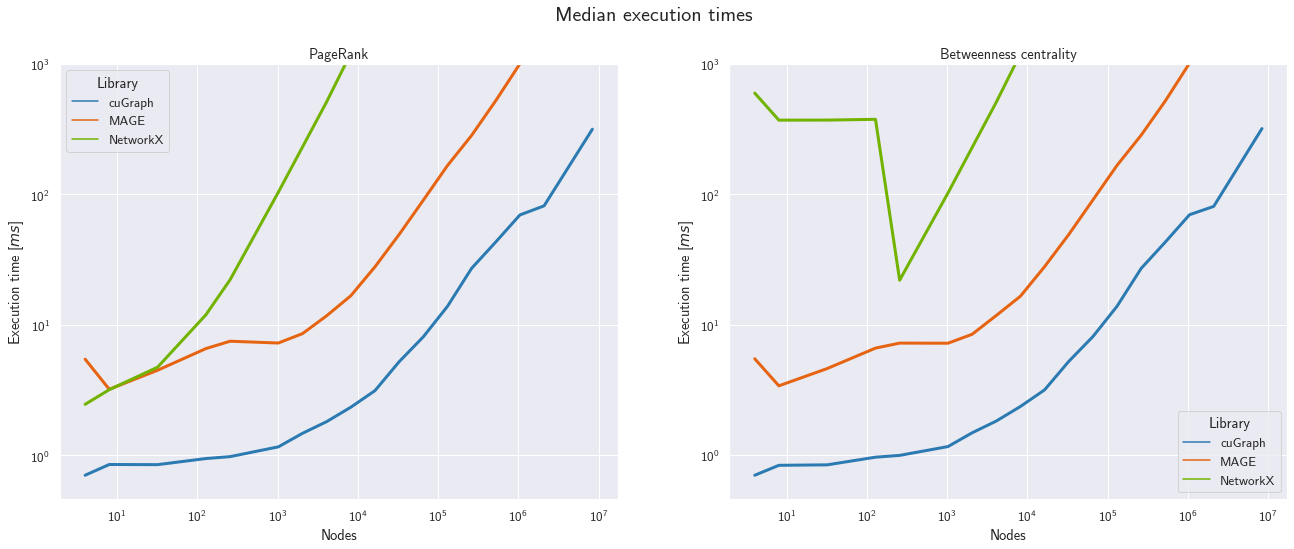

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(22, 8))

fig.suptitle("Median execution times", fontsize=20)

p1_1 = sns.lineplot(
    data=pr_medians_df,
    x="scale",
    y="median_execution_time",
    hue="Library",
    palette=palette,
    linewidth=3,
    ax=ax[0],
)
ax[0].set(
    title="PageRank",
    xlabel="Nodes",
    xscale="log",
    ylabel="Execution time [$\it{ms}$]",
    yscale="log",
    ylim=(None, 1000),
)

p1_2 = sns.lineplot(
    data=bc_medians_df,
    x="scale",
    y="median_execution_time",
    hue="Library",
    palette=palette,
    linewidth=3,
    ax=ax[1],
)
ax[1].set(
    title="Betweenness centrality",
    xlabel="Nodes",
    xscale="log",
    ylabel="Execution time [$\it{ms}$]",
    yscale="log",
    ylim=(None, 1000),
)

plt.savefig(f"{PATH}/execution_time_log_plot.png")

plt.show()

In [7]:
pr_data["log_scale"] = pr_data.apply(
    lambda row: int(round(np.log2(row["scale"]), 0)), axis=1
)
bc_data["log_scale"] = bc_data.apply(lambda row: np.rint(np.log2(row["scale"])), axis=1)

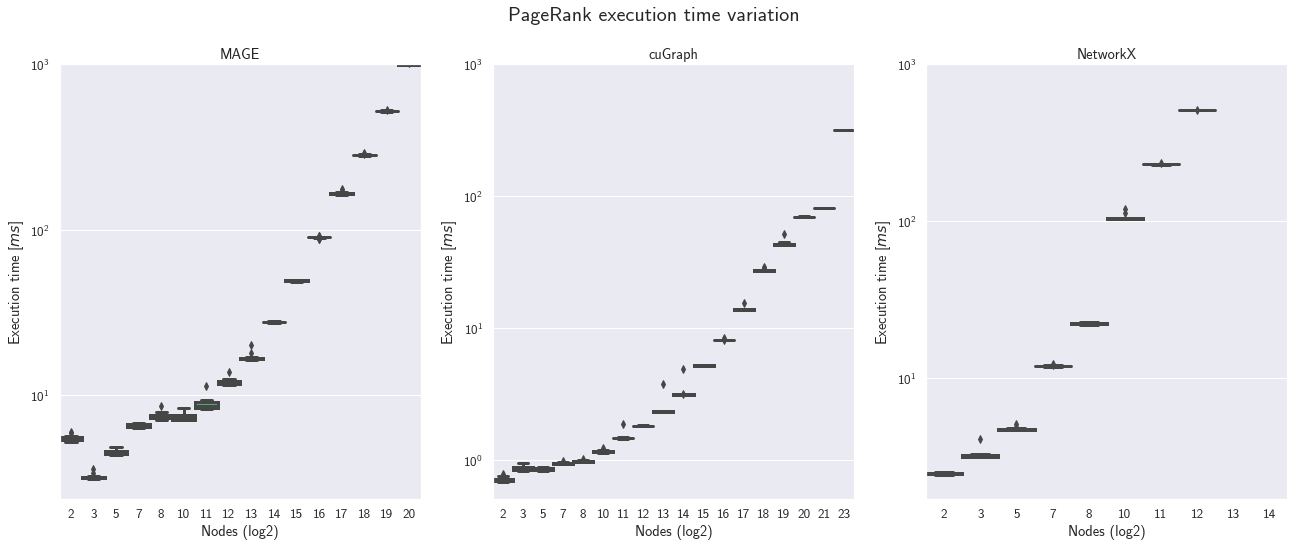

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(22, 8))

fig.suptitle("PageRank execution time variation", fontsize=20)

p2_1 = sns.boxplot(
    data=pr_data.loc[
        (pr_data.library == "MAGE") & (pr_data.execution_time != math.inf)
    ],
    x="log_scale",
    y="execution_time",
    palette=palette,
    width=1,
    linewidth=3,
    ax=ax[0],
)
ax[0].set(
    title="MAGE",
    xlabel="Nodes (log2)",
    ylabel="Execution time [$\it{ms}$]",
    yscale="log",
    ylim=(None, 1000),
)

p2_2 = sns.boxplot(
    data=pr_data.loc[
        (pr_data.library == "cuGraph") & (pr_data.execution_time != math.inf)
    ],
    x="log_scale",
    y="execution_time",
    palette=palette,
    width=1,
    linewidth=3,
    ax=ax[1],
)
ax[1].set(
    title="cuGraph",
    xlabel="Nodes (log2)",
    ylabel="Execution time [$\it{ms}$]",
    yscale="log",
    ylim=(None, 1000),
)

p2_3 = sns.boxplot(
    data=pr_data.loc[
        (pr_data.library == "NetworkX") & (pr_data.execution_time != math.inf)
    ],
    x="log_scale",
    y="execution_time",
    palette=palette,
    width=1,
    linewidth=3,
    ax=ax[2],
)
ax[2].set(
    title="NetworkX",
    xlabel="Nodes (log2)",
    ylabel="Execution time [$\it{ms}$]",
    yscale="log",
    ylim=(None, 1000),
)

plt.savefig(f"{PATH}/execution_time_variation_log_boxplot.png")

plt.show()